# Flight Cancellation Data Analysis

## Project Overview
This program is tasked to analyze U.S. flight data in 2024. 

The goal of this project is to determine key insights which could majorly impact airline performance due to flight cancellation. 

By using standard coding techniques from pandas, we can clean and manipulate the flights dataset to help research key points which may correlate to cancellations the most. We can then create bar plots with matplotilb to help visualize the relationships found from the results. 

A successful program would give us valuable insights on the current obstacles in U.S. airlines.

## Part 1: Importing and Inspecting
We first begin by importing the necessary modules that will help in the data analysis process. Then we will load and examine the dataset to have a clear understanding of what we'll soon be analyzing.

In [1]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV dataset
df = pd.read_csv('flight_data_2024.csv')

In [2]:
# Copying the original df to avoid modifying it
flights_df = df.copy()

# Checking the first 5 rows of the dataset
print(flights_df.head())

   year  month  day_of_month  day_of_week   fl_date origin origin_city_name  \
0  2024      1             1            1  1/1/2024    JFK     New York, NY   
1  2024      1             1            1  1/1/2024    MSP  Minneapolis, MN   
2  2024      1             1            1  1/1/2024    JFK     New York, NY   
3  2024      1             1            1  1/1/2024    RIC     Richmond, VA   
4  2024      1             1            1  1/1/2024    DTW      Detroit, MI   

  origin_state_nm  dep_time  taxi_out  wheels_off  wheels_on  taxi_in  \
0        New York    1247.0      31.0      1318.0     1442.0      7.0   
1       Minnesota    1001.0      20.0      1021.0     1249.0      6.0   
2        New York    1411.0      21.0      1432.0     1533.0      8.0   
3        Virginia    1643.0      13.0      1656.0     1747.0     12.0   
4        Michigan    1010.0      21.0      1031.0     1016.0      4.0   

   cancelled  air_time  distance  weather_delay  late_aircraft_delay  
0          0   

In [3]:
# Checking each column's Dtype and null count
print(flights_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 1048575 non-null  int64  
 1   month                1048575 non-null  int64  
 2   day_of_month         1048575 non-null  int64  
 3   day_of_week          1048575 non-null  int64  
 4   fl_date              1048575 non-null  object 
 5   origin               1048575 non-null  object 
 6   origin_city_name     1048575 non-null  object 
 7   origin_state_nm      1048575 non-null  object 
 8   dep_time             1026022 non-null  float64
 9   taxi_out             1025450 non-null  float64
 10  wheels_off           1025450 non-null  float64
 11  wheels_on            1024898 non-null  float64
 12  taxi_in              1024898 non-null  float64
 13  cancelled            1048575 non-null  int64  
 14  air_time             1022824 non-null  float64
 15

#### Important Columns
1. fl_date: YYYY-MM-DD date of flight scheduled to begin.
2. origin: The name of the airport which scheduled the flight.
3. origin_city_name: The name of the City (with its State) where the flight is scheduled.
4. origin_state_nm: The name of the State where the flight is scheduled.
5. cancelled: The flight's cancellation status. (0 = Not cancelled, 1 = cancelled).
6. weather_delay: The flight's delay due to disruptive weather.
7. late_aircraft_delay: The flight's delay due to delays from other flights.

## Part 2: Data Cleaning
We first begin by importing the necessary modules that can help in the data analysis. Then we will load, examine, and clean the dataset to ensure it's ready for analysis.

#### The first change we should make is to convert all date-related columns into the datetime dtype.

In [4]:
# Convert the 'Date' column to datetime
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'])
print("fl_date Data type:")
print(flights_df['fl_date'].dtype)

fl_date Data type:
datetime64[ns]


#### Next, we will remove the redundant date columns because fl_date is already enough to represent the dates of each flight.

In [5]:
# Dropping redundant date columns
flights_df = flights_df.drop(['year', 'month', 'day_of_month', 'day_of_week'], axis=1)
print(flights_df.head())

     fl_date origin origin_city_name origin_state_nm  dep_time  taxi_out  \
0 2024-01-01    JFK     New York, NY        New York    1247.0      31.0   
1 2024-01-01    MSP  Minneapolis, MN       Minnesota    1001.0      20.0   
2 2024-01-01    JFK     New York, NY        New York    1411.0      21.0   
3 2024-01-01    RIC     Richmond, VA        Virginia    1643.0      13.0   
4 2024-01-01    DTW      Detroit, MI        Michigan    1010.0      21.0   

   wheels_off  wheels_on  taxi_in  cancelled  air_time  distance  \
0      1318.0     1442.0      7.0          0      84.0       509   
1      1021.0     1249.0      6.0          0      88.0       622   
2      1432.0     1533.0      8.0          0      61.0       288   
3      1656.0     1747.0     12.0          0      51.0       288   
4      1031.0     1016.0      4.0          0      45.0       237   

   weather_delay  late_aircraft_delay  
0              0                    0  
1              0                    0  
2             

#### Now, we will then have a closer look at the null values since a handful of columns have them.

In [6]:
# Null values in the cleaned dataset
nulls_found = flights_df.isnull().any(axis=1)
print("Total null values from the entire dataset (True = Null #)")
print(nulls_found.value_counts())
print()

# Null values for remaining columns
null_values = flights_df.isnull().sum()
print("Total null values from each column")
print(null_values[null_values > 0])

Total null values from the entire dataset (True = Null #)
False    1022824
True       25751
Name: count, dtype: int64

Total null values from each column
dep_time      22553
taxi_out      23125
wheels_off    23125
wheels_on     23677
taxi_in       23677
air_time      25751
dtype: int64


#### All null values are related to Cancelled Flights.
Printing the crosstab below shows that the null values only represent 2% (0.02) of the entire dataset. But all null values are found in Cancelled flights, which is realistic because if a flight was cancelled, it wouldn't have any data on departure time, air time, taxi-out time etc. The flights never happened, so it's accurate to leave those parts blank (instead of 0).

Removing the rows with null values will also remove all rows related to cancelled flights. Since researching cancelled flights is our project's goal, we will avoid doing this.

In [7]:
# Creating a crosstab to find relationships between "nulls_found" and "cancelled" 
cross_tab = pd.crosstab(
    nulls_found, 
    flights_df['cancelled'], 
    rownames=['Null Values'],
    colnames=['Flight Cancelled'],
    normalize='all'
)

# Crosstab Renaming
cross_tab = cross_tab.rename(index={False: 'No Nulls', True: 'Has Nulls'})
cross_tab = cross_tab.rename(columns={0: 'Not Cancelled', 1: 'Cancelled'})
cross_tab = cross_tab.round(2)

cross_tab

Flight Cancelled,Not Cancelled,Cancelled
Null Values,,
No Nulls,0.98,0.00
Has Nulls,0.00,0.02


#### Instead, we will remove the columns unrelated to cancellations.

The dep_time, taxi_out, wheels_off, wheels_on, taxi_in, and air_time columns are null because there's very little to no information about them in cancelled flights.

Since we're tasked to research flight cancellations, and the columns mentioned above don't matter in terms of cancellations, it is safe to remove them.

We will also be removing distance because cancelled flights would always have distance set to 0 since traveling never happened.

In [8]:
flights_df = flights_df.drop(['dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'air_time', 'distance'], axis=1)
print(flights_df.head())

     fl_date origin origin_city_name origin_state_nm  cancelled  \
0 2024-01-01    JFK     New York, NY        New York          0   
1 2024-01-01    MSP  Minneapolis, MN       Minnesota          0   
2 2024-01-01    JFK     New York, NY        New York          0   
3 2024-01-01    RIC     Richmond, VA        Virginia          0   
4 2024-01-01    DTW      Detroit, MI        Michigan          0   

   weather_delay  late_aircraft_delay  
0              0                    0  
1              0                    0  
2              0                    0  
3              0                    0  
4              0                    0  


#### After examining the newly cleaned dataset's null count, we can move on to the data analysis.

In [9]:
# Null values in the cleaned dataset
nulls_found = flights_df.isnull().any(axis=1)
print("Total null values from the entire dataset (True = Null #)")
print(nulls_found.value_counts())
print()

# Null values for remaining columns
null_values = flights_df.isnull().sum()
print("Total null values from each column")
print(null_values[null_values > 0])

Total null values from the entire dataset (True = Null #)
False    1048575
Name: count, dtype: int64

Total null values from each column
Series([], dtype: int64)


## Part 3: Cancellation by Days of the Week
With a newly cleaned dataset, we can now research on factors that would most likely cause disruptions on flights.

The first factor I hypothesized on were the weekdays (Monday-Sunday). It's common for flights to be extremely busy at around Friday - Monday. Those on Friday/Saturday would be flying for end‑of‑week business/leisure travel. Those on Sunday/Monday would be flying to return to work or begin the week's leisure travel.

#### Theory: If many people chose to fly at around Friday-Monday all at once, then flight cancellations caused by overcrowded airports should happen more often.

In [10]:
# Defining the days of the week
flights_df['day_name'] = flights_df['fl_date'].dt.day_name()

# % of all flights by day of the week
flights_week = flights_df.groupby('day_name').size() / len(flights_df) * 100

# % of all cancellations by day of the week
cancelled_week = flights_df[flights_df['cancelled'] == 1].groupby('day_name').size()
cancelled_week = cancelled_week / cancelled_week.sum() * 100
cancelled_week = cancelled_week.reindex(flights_week.index).fillna(0)

# Ordering the weekdays
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
flights_week = flights_week.reindex(order)
cancelled_week = cancelled_week.reindex(order)

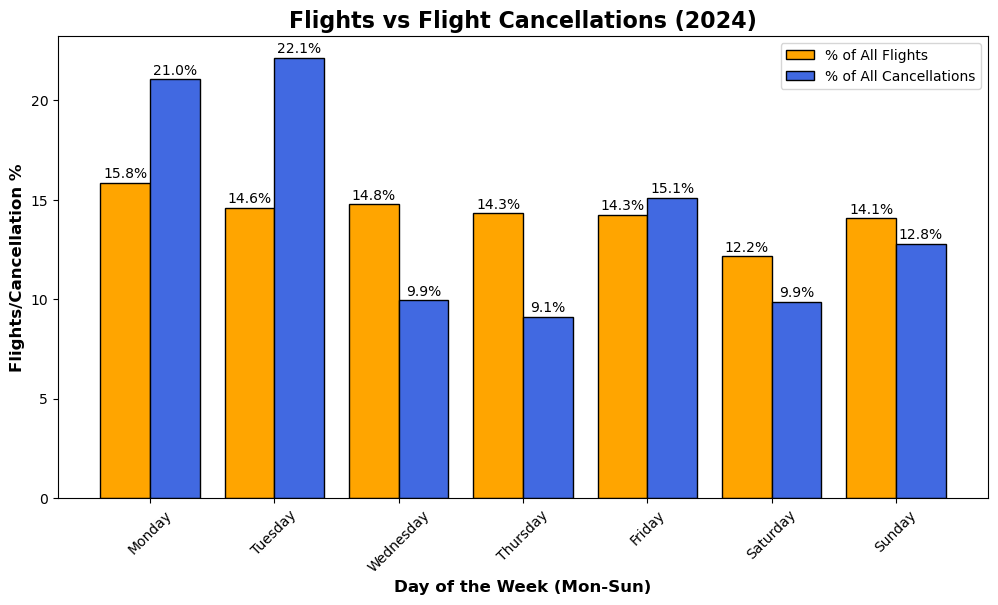

In [11]:
# Plotting
x = range(len(order))
plt.figure(figsize=(12, 6))

plt.bar([i - 0.2 for i in x], flights_week, width=0.4, label='% of All Flights', color='orange', edgecolor='black')
plt.bar([i + 0.2 for i in x], cancelled_week, width=0.4, label='% of All Cancellations', color='royalblue', edgecolor='black')

plt.title('Flights vs Flight Cancellations (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week (Mon-Sun)', fontsize=12, fontweight='bold')
plt.ylabel('Flights/Cancellation %', fontsize=12, fontweight='bold')
plt.xticks(x, order, rotation=45)
plt.legend()

# Top labels
for i, (f, c) in enumerate(zip(flights_week, cancelled_week)):
    plt.text(i - 0.2, f + 0.25, f'{f:.1f}%', ha='center')
    plt.text(i + 0.2, c + 0.25, f'{c:.1f}%', ha='center')

# Printing plot
plt.show()

##### Support for reading the summary page below:
1. Monday
2. 15.84% of flights were hosted on Monday
3. 21.05% of flight cancellations happened on Monday

In [12]:
# Printing weekday flights summary
print("Flight Cancellations by Day of the Week (2024)")
print("==============================================")
day_summary = pd.DataFrame({
    'Day of the Week'       : order,
    '% of All Flights'     : flights_week.round(2).values,
    '% of All Cancellations' : cancelled_week.round(2).values
})
print(day_summary.to_string(index=False, float_format="{:.2f}".format))

Flight Cancellations by Day of the Week (2024)
Day of the Week  % of All Flights  % of All Cancellations
         Monday             15.84                   21.05
        Tuesday             14.58                   22.13
      Wednesday             14.77                    9.94
       Thursday             14.32                    9.11
         Friday             14.26                   15.11
       Saturday             12.16                    9.87
         Sunday             14.07                   12.79


#### Results: 
##### The % of flights hosted in each weekday are nearly identical to each other. 
##### The % of cancellations in each weekday are random.
It appears that nearly every day of the week have around 14-15% of flights. The only exception is Saturday, which only took 12.16% of flights. But what surprised me the most was how randomized the cancellation %'s are. Monday and Tuesday appeared to have over 20% of flights being cancelled each, over double the %'s of Wednesday, Thursday, and Friday. Because of the polarization between overall flights and cancelled flights, I've concluded that the weekdays may not have an impact on flight cancellation after all.

## Part 4: Cancellation by Days of the Week with Weather Delay
The second factor I hypothesized on were the weather delays. Naturally, air travel is dangerous to commit to during harsh weather like heavy rainstorms. Airlines may choose to delay air travel for a while in hopes that the harsh weather passes through. But if heavy weather still persists after a few hours or so, the airlines are forced to cancel their trips. Bad weather is less controllable compared to overcrowded days of the week, so it may help explain why Monday and Tuesday had so many instances of cancellations.

#### Theory: If heavy weather occured more often in certain days of the week, then flight cancellations during those same days of the week will happen more often.

In [13]:
# Defining the days of the week
flights_df['day_name'] = flights_df['fl_date'].dt.day_name()

# % of all flights by day of the week
flights_week = flights_df.groupby('day_name').size() / len(flights_df) * 100

# % of all cancellations by day of the week
cancelled_week = flights_df[flights_df['cancelled'] == 1].groupby('day_name').size()
cancelled_week = cancelled_week / cancelled_week.sum() * 100
cancelled_week = cancelled_week.reindex(flights_week.index).fillna(0)

# % of all weather delays by day of the week
weather_delay_by_day = flights_df.groupby('day_name')['weather_delay'].sum()
delays_week = weather_delay_by_day / weather_delay_by_day.sum() * 100

# Ordering the weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cancelled_week = cancelled_week.reindex(order)
delays_week = delays_week.reindex(order)

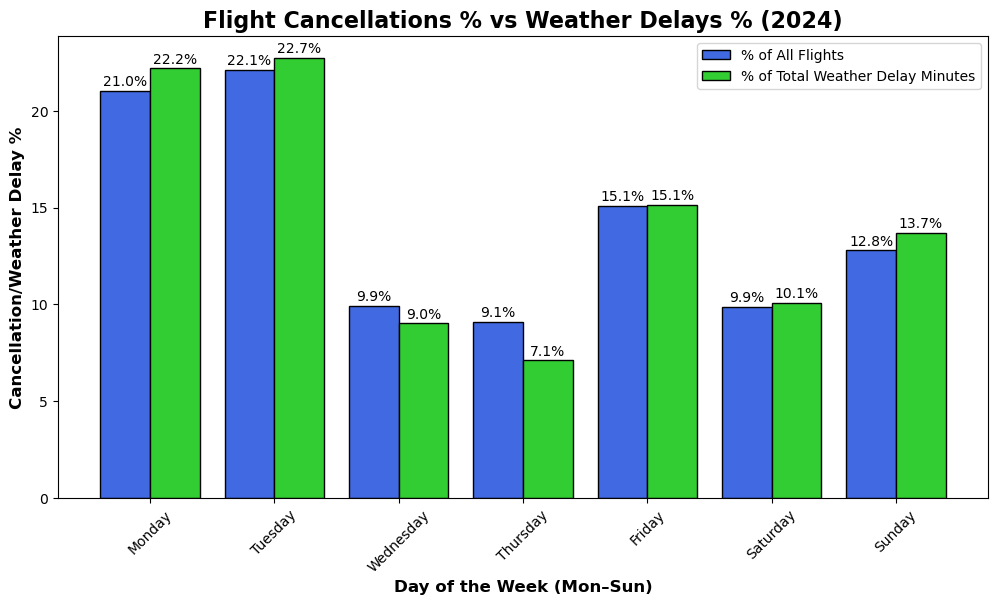

In [14]:
# Plotting
x = range(len(order))
plt.figure(figsize=(12, 6))
plt.bar([i - 0.2 for i in x], cancelled_week, width=0.4, label='% of All Flights', color='royalblue', edgecolor='black')
plt.bar([i + 0.2 for i in x], delays_week, width=0.4, label='% of Total Weather Delay Minutes', color='limegreen', edgecolor='black')

plt.title('Flight Cancellations % vs Weather Delays % (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week (Mon–Sun)', fontsize=12, fontweight='bold')
plt.ylabel('Cancellation/Weather Delay %', fontsize=12, fontweight='bold')
plt.xticks(x, order, rotation=45)
plt.legend()

# Top labels
for i, (f, w) in enumerate(zip(cancelled_week, delays_week)):
    plt.text(i - 0.2, f + 0.25, f'{f:.1f}%', ha='center')
    plt.text(i + 0.2, w + 0.25, f'{w:.1f}%', ha='center')

# Printing plot
plt.show()

##### Support for reading the summary page below:
1. Monday
2. 15.84% of flights were hosted on Monday
3. 21.05% of flight cancellations happened on Monday
4. 22.21% of weather delays happened on Monday

In [15]:
print("Flight Cancellations & Weather Delays by Day of the Week (2024)")
print("===============================================================")

# Build a clean little DataFrame just for display
day_summary = pd.DataFrame({
    'Day of the Week'      : order,
    '% of All Flights'     : flights_week.round(2).values,
    '% of All Cancellations' : cancelled_week.round(2).values,
    '% of All Weather Delays'   : delays_week.round(2).values
})

print(day_summary.to_string(index=False, float_format="{:.2f}".format))

Flight Cancellations & Weather Delays by Day of the Week (2024)
Day of the Week  % of All Flights  % of All Cancellations  % of All Weather Delays
         Monday             14.26                   21.05                    22.21
        Tuesday             15.84                   22.13                    22.73
      Wednesday             12.16                    9.94                     9.02
       Thursday             14.07                    9.11                     7.12
         Friday             14.32                   15.11                    15.14
       Saturday             14.58                    9.87                    10.09
         Sunday             14.77                   12.79                    13.69


#### Results: 
##### The % of cancellations in each weekday are identical to the % of weather delays.
The results on weather delays have just explained the eariler confusion on the disconnect between all flights/cancellations in each weekday. We see that 22% of weather delays have struck Monday and Tuesday each. Meanwhile on Wednesdays, Thursdays, and Fridays, they've been struck by around 10% of weather delays each, half of what Monday and Tuesday had.

Because the weather delays only have different results of flight cancellations by only 1-2%, it is clear that weather delays are a huge factor in causing flight cancellations.

## Part 5: Cancellation Analysis by Top 10 U.S. States
Now that we've found a major keypoint that's linked to flight cancellations, weather delays, we will continue the analysis by testing the key factor into a different environment. Instead of comparing cancellation results split by days of the week, we will now compare results based on the top 10 U.S. states who have the highest chance of flights being cancelled.

For example, Washington had 1107 cancelled flights and 26310 overall recorded flights. 1107 / 26310 = 4.21%. Washington has a cancellation rate of 4.21%.

The reason why it's important to change environments is because we need to confirm the validity of weather delays being a primary cause of flights being cancelled. If the results are polarized, then the weather delay link back on the weekdays may be coincidental the whole time.

#### Theory: If weather delays were seen as the cause of flights being cancelled, based on the days of the week, then weather delays should be just as valid when compared in the Top 10 U.S. States.

In [16]:
# Calculate total flights and cancelled flights per state
state_stats = flights_df.groupby('origin_state_nm').agg(
    total_flights=('cancelled', 'count'),
    cancelled_flights=('cancelled', 'sum'),
    total_weather_delay_min=('weather_delay', 'sum')
).reset_index()

# Cancellation rate: the % of flights that were cancelled (by each state)
state_stats['cancellation_rate_%'] = (state_stats['cancelled_flights'] / state_stats['total_flights'] * 100).round(2)

# Weather Delay rate: the % of flights that experienced weather delays (by each state)
total_us_weather_delay = state_stats['total_weather_delay_min'].sum()
state_stats['weather_delay_rate_%'] = (state_stats['total_weather_delay_min'] / total_us_weather_delay * 100).round(2)

# Creating the top 10
top10 = state_stats.nlargest(10, 'cancellation_rate_%')
order = top10['origin_state_nm'].tolist()
cancel_rates = top10['cancellation_rate_%'].values
weather_shares = top10['weather_delay_rate_%'].values
top_10 = state_stats.nlargest(10, 'cancellation_rate_%').copy()
top_10['cancelled_flights'] = top_10['cancelled_flights'].astype(int)
top_10['total_flights']    = top_10['total_flights'].astype(int)

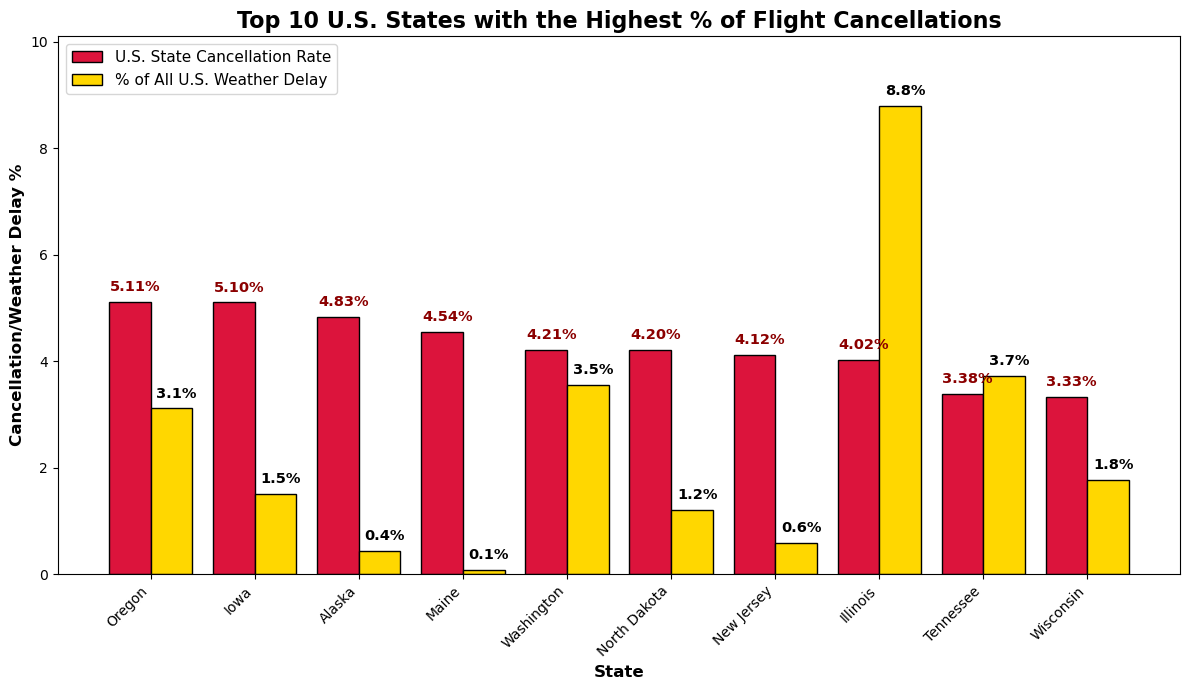

In [17]:
# Plotting
x = range(len(order))

plt.figure(figsize=(12, 7))

plt.bar([i - 0.2 for i in x], cancel_rates, width=0.4,
        label='U.S. State Cancellation Rate', 
        color='crimson', edgecolor='black')
plt.bar([i + 0.2 for i in x], weather_shares, width=0.4,
        label='% of All U.S. Weather Delay', 
        color='gold', edgecolor='black')

plt.title('Top 10 U.S. States with the Highest % of Flight Cancellations', 
          fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Cancellation/Weather Delay %', fontsize=12, fontweight='bold')
plt.xticks(x, order, rotation=45, ha='right')
plt.legend(fontsize=11)

# Top labels
for i, (canc, weath) in enumerate(zip(cancel_rates, weather_shares)):
    plt.text(i - 0.15, canc + 0.15, f'{canc:.2f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=10.5, color='darkred')
    plt.text(i + 0.25, weath + 0.15, f'{weath:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=10.5)

plt.ylim(0, max(cancel_rates.max(), weather_shares.max()) * 1.15)
plt.tight_layout()
plt.show()

##### Support for reading the summary page below:
1. Oregon
2. 5.11% of all flights in Oregon have been cancelled.
3. 3.11% of all weather delays in the U.S. have happened in Oregon.
4. There are 558 cancelled flights in Oregon.
5. There are 10924 total flights recorded in Oregon.

In [18]:
# Summary
print("Top 10 States: Highest Cancellation Rate (2024)")
print("================================================")
print(top_10[[
    'origin_state_nm',
    'cancellation_rate_%',
    'weather_delay_rate_%',
    'cancelled_flights',
    'total_flights'
]].to_string(index=False, float_format="{:.2f}".format))

Top 10 States: Highest Cancellation Rate (2024)
origin_state_nm  cancellation_rate_%  weather_delay_rate_%  cancelled_flights  total_flights
         Oregon                 5.11                  3.11                558          10924
           Iowa                 5.10                  1.50                196           3840
         Alaska                 4.83                  0.43                226           4677
          Maine                 4.54                  0.08                 74           1629
     Washington                 4.21                  3.55               1107          26310
   North Dakota                 4.20                  1.21                115           2738
     New Jersey                 4.12                  0.58                854          20725
       Illinois                 4.02                  8.78               2098          52246
      Tennessee                 3.38                  3.72                707          20937
      Wisconsin       

#### Results: 
##### The cancellation rate in each U.S. state do not match with the % of weather delays.
We've put the cancellation/weather delay theory to the test, and the results are unstable in the U.S. States environment. The top 4 ranked states, (Oregon, Iowa, Alaska, Maine), have recieved the least shared amount of weather delays in the U.S. yet still have the highest % chance of thier flights being cancelled. Meanwhile, states with the highest shared amount of weather delays do not have a substantial increase in cancellation rates. Illinois, which took 8.78% of all weather delays in the U.S., should theoretically have the highest rate of cancellations. Yet it's lower than 7 other states including Maine which only took in 0.08% of all weather delays. 

It appears that weather delays may not be impactful towards flight cancellations at all. Until I realized the possiblity of some States being more adaptable to weather delays.

## Part 6: Cancellation Analysis by U.S. Regions
The earlier testing of the top 10 U.S. States had disproven the theory on weather delays being the primary cause of flight cancellations. But the cancellation/weather delay results, for the days of the week, are so close to each other that they couldn't just be a coincidence entirely. So I've looked closely on the top 10 states results, and compared them to the U.S. map. Looking for the 10 states, I found a new trend. Oregon, Iowa, Alaska, Maine, Washington, North Dakota, New Jersey, and Wisconsin are located further up North than Illinois and Tennessee. 

In general, Northern States are less likely to have heavy weather occur, compared to Southen States. So perhaps the Northern states taking 8/10 of the cancellation ranking may have been up there not because of weather delay % alone, but maybe because they also also weren't trained to prepare for them too. That's why for this last test, we will be using the official U.S. Census labeling of regions and divisions, (Northeast, Midwest, South, West), to make comparisons between cancellation rates and weather delays %.

#### Theory: If Northern regions in the U.S. are less prepared for weather delays, since heavy weather is rarely seen in there, then they would have a higher cancellation rate than the Southern regions.

In [19]:
# Add the state regions column
def assign_state_region(state):
    northeast_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania']
    
    midwest_states = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
        'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    
    south_states = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
        'Virginia', 'West Virginia', 'District of Columbia',
        'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
        'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    
    west_states = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
        'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    
    if state in northeast_states:
        return 'Northeast'
    elif state in midwest_states:
        return 'Midwest'
    elif state in south_states:
        return 'South'
    elif state in west_states:
        return 'West'
    else:
        return 'Others' # American states outside of North America

# Apply state regions to flights_df
flights_df['state_region'] = flights_df['origin_state_nm'].apply(assign_state_region)

# Printing to test
print(flights_df['state_region'].value_counts())

state_region
South        435608
West         321498
Midwest      157455
Northeast    126345
Others         7669
Name: count, dtype: int64


In [20]:
# Definining regional
regional = flights_df.groupby('state_region').agg(
    total_flights=('cancelled', 'count'),
    cancelled_flights=('cancelled', 'sum'),
    total_weather_delay=('weather_delay', 'sum')
).reset_index()

regional['cancellation_rate_%'] = (regional['cancelled_flights'] / regional['total_flights'] * 100).round(2)
total_weather = regional['total_weather_delay'].sum()
regional['weather_delay_share_%'] = (regional['total_weather_delay'] / total_weather * 100).round(2)

regional = regional.sort_values('cancellation_rate_%', ascending=False)
print(regional)

  state_region  total_flights  cancelled_flights  total_weather_delay  \
0      Midwest         157455               4680               358098   
1    Northeast         126345               3554               115385   
4         West         321498               7331               341250   
3        South         435608               7672               436653   
2       Others           7669                 69                  949   

   cancellation_rate_%  weather_delay_share_%  
0                 2.97                  28.59  
1                 2.81                   9.21  
4                 2.28                  27.25  
3                 1.76                  34.87  
2                 0.90                   0.08  


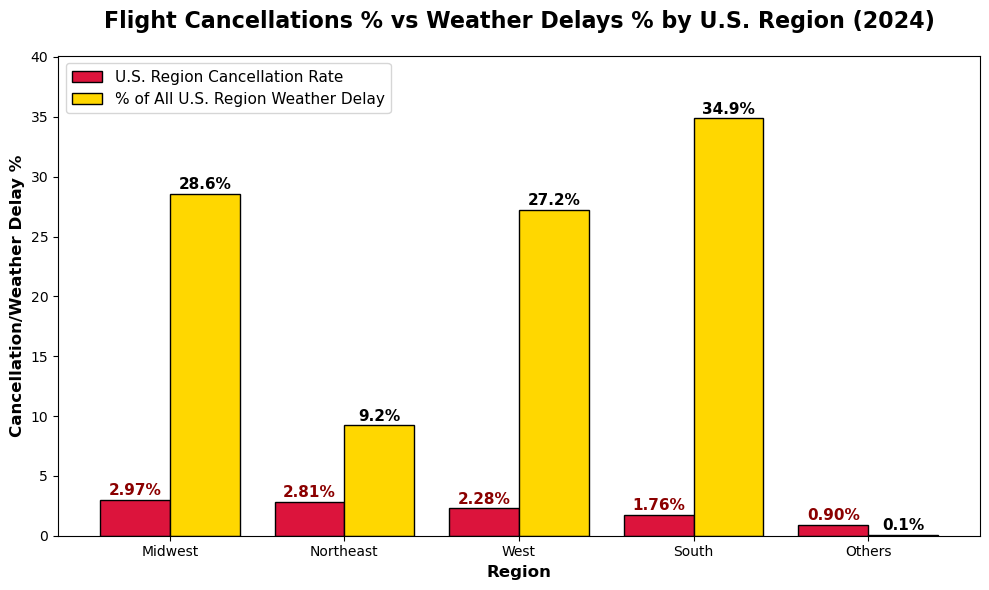

In [21]:
# State regions chart
order = regional['state_region'].tolist()
cancel_rates = regional['cancellation_rate_%'].values
weather_shares = regional['weather_delay_share_%'].values

x = range(len(order))

plt.figure(figsize=(10, 6))

plt.bar([i - 0.2 for i in x], cancel_rates, width=0.4,
        label='U.S. Region Cancellation Rate',
        color='crimson', edgecolor='black')
plt.bar([i + 0.2 for i in x], weather_shares, width=0.4,
        label='% of All U.S. Region Weather Delay',
        color='gold', edgecolor='black')

plt.title('Flight Cancellations % vs Weather Delays % by U.S. Region (2024)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Cancellation/Weather Delay %', fontsize=12, fontweight='bold')
plt.xticks(x, order)
plt.legend(fontsize=11)

# Labels
for i, (canc, weath) in enumerate(zip(cancel_rates, weather_shares)):
    plt.text(i - 0.2, canc + 0.15, f'{canc:.2f}%', ha='center', va='bottom',
             fontweight='bold', fontsize=11, color='darkred')
    plt.text(i + 0.2, weath + 0.15, f'{weath:.1f}%', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

plt.ylim(0, max(cancel_rates.max(), weather_shares.max()) * 1.15)
plt.tight_layout()
plt.show()

In [22]:
# Summary
print("Flight Cancellation Performance by U.S. Region (2024)")
print("=" * 78)
print(regional[[
    'state_region',
    'cancellation_rate_%',
    'weather_delay_share_%',
    'cancelled_flights',
    'total_flights'
]].to_string(index=False, float_format="{:.2f}".format))

Flight Cancellation Performance by U.S. Region (2024)
state_region  cancellation_rate_%  weather_delay_share_%  cancelled_flights  total_flights
     Midwest                 2.97                  28.59               4680         157455
   Northeast                 2.81                   9.21               3554         126345
        West                 2.28                  27.25               7331         321498
       South                 1.76                  34.87               7672         435608
      Others                 0.90                   0.08                 69           7669


#### Results: 
##### Weather delays do cause cancellations (for Northern regions unprepared for it).
The final test has shown that the Northeasten States, which only had 9.21% of all weather delays, still had the 2nd highest rate of cancellation of 2.81%. Meanwhile the Southern States with the highest weather delays of 34.87% had the lowest rate of cancellation of 1.76% (when excluding "Others". Finally, the West and Midwest regions have a mixed amount of states that are located North and South, so they both have a similar relation of cancellation rates and weather delays.

The earlier top 10 U.S. test and the weekday tests are both true after all. Certain times and locations with a higher % of weather delays do increase the rate of cancellation. But for Northern U.S. States that are comfortable with heavy weather being rare, their rate of cancellations can be higher due to them being less prepared. The final test on regions has been successful.

## Part 7: Findings and Conclusion
1. Flight cancellations have no relation to the days of the week. Since each of the days have an equal amount of overall flights scheduled.
2. Weather delays and flight cancellations are nearly identical to each other, when compared by the days of the week.
3. Northen U.S. States, which are least likely to have weather delays, would have higher cancellation rates compared to all other U.S. States.

##### Conclusion: U.S. Airlines will have a higher chance to cancel the scheduled flights during moments when weather delays occur. Cancellations from weather delays will occur far more likely if the weather delay is located in the unprepared Northern regions